## 🎲 Python Lab: Probability and Distributions
> [Principles of ML course](https://github.com/mnarimani/PML_Spring2025_SUT) - Spring 2025 - Sharif <br>
> Lab sessions - Session 4 - March 8, 2025 <br>
> Author: M Narimani <br>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/mnarimani/PML_Spring2025_SUT/blob/main/Week04/01_Prob_TODO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/mnarimani/PML_Spring2025_SUT/blob/main/Week04/01_Prob_TODO.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## 🛠️ Setup: Importing Libraries

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

## 1️⃣  Discrete Probability Distributions

In [7]:
from scipy.stats import bernoulli, binom, poisson, geom, norm

#### Bernoulli Distribution
Single trial with success probability $p$

$P(X=k) = p^k(1-p)^{1-k}\quad\text{for }k\in\{0,1\}$

> **TODO**: Simulate a dice roll. Define `Success` if the `roll >= threshold` (e.g., 5 or 6).

In [10]:
# def bernoulli_dice_success(success_threshold=5):
#     pass

In [11]:
p_success = 1/3  # For success_threshold of 5, we get p = 2 * (1/6).
n_trials = 1000

> **TODO**: Generate Bernoulli samples

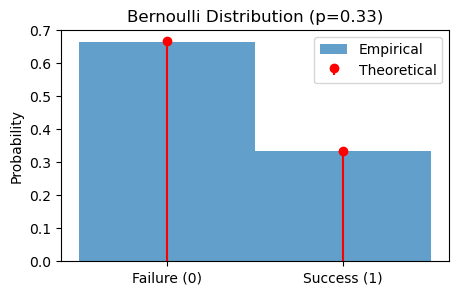

In [13]:
# Simulate 1000 Bernoulli trials (dice rolls)
# bern_samples = # TODO
# bern_samples = bernoulli.rvs(p_success, size=n_trials) # Alternative way

# Plot
plt.figure(figsize=(5,3))
x = np.array([0, 1])
bernoulli_pmf = np.array([1-p_success, p_success])
plt.hist(bern_samples, bins=[-0.5, 0.5, 1.5], density=True, alpha=0.7, label='Empirical')
plt.stem(x, bernoulli_pmf, linefmt='r-', markerfmt='ro', basefmt=' ', label='Theoretical')
plt.xticks([0, 1], ['Failure (0)', 'Success (1)'])
plt.title(f'Bernoulli Distribution (p={p_success:.2f})')
plt.ylabel('Probability')
plt.legend()
plt.show()

#### Binomial Distribution
Number of successes in n independent trials

$P(X=k) = \binom{n}{k}p^k(1-p)^{n-k}$

In [15]:
# Dice experiment: Count 5s/6s in 10 rolls
n_dice = 10

> **TODO**: Generate Binomial data. Simulate `n_rolls` dice rolls and count the number of successes (`roll >= threshold`).

In [17]:
# def binomial_dice_success(n_rolls, success_threshold=5):
#     pass

# binom_samples = # TODO

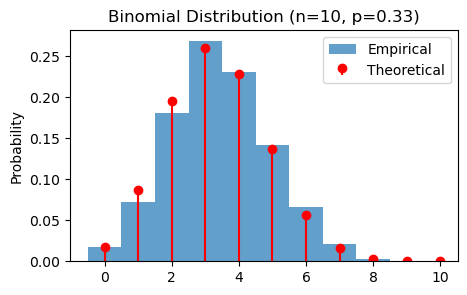

In [18]:
# Theoretical PMF
k_values = np.arange(0, n_dice+1)
pmf = binom.pmf(k_values, n_dice, p_success)

plt.figure(figsize=(5,3))
plt.hist(binom_samples, bins=k_values-0.5, density=True, alpha=0.7, label='Empirical')
plt.stem(k_values, pmf, linefmt='r-', markerfmt='ro', basefmt=' ', label='Theoretical')
plt.title(f'Binomial Distribution (n={n_dice}, p={p_success:.2f})')
plt.ylabel('Probability')
plt.legend()
plt.show()

#### Poisson Distribution
Events in fixed interval with rate $\lambda$

$P(X=k) = e^{-\lambda}\frac{\lambda^k}{k!}$

In [20]:
# Simulate 1000 experiments, each with 100 dice rolls
n_rolls = 100
# Theoretical PMF for Poisson distribution (lambda = n * p, where p = 1/6)
lambda_visits = n_rolls * (1/6)

> **TODO**: Generate Poisson data. Simulate `n_rolls` dice rolls and count the number of 6s (approximating Poisson).

In [22]:
# def poisson_approximation_for_six(n_rolls, success_face=6):
#     pass

# poisson_samples = # TODO
# poisson_samples = poisson.rvs(lambda_visits, size=n_hours) # Alternative way

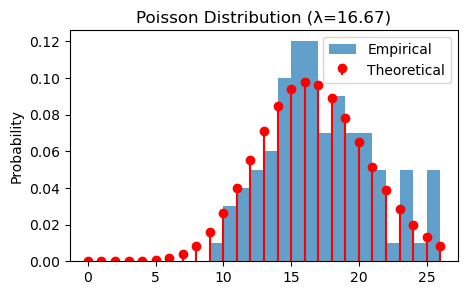

In [23]:
# Theoretical PMF
k_values = list(range(0, max(poisson_samples) + 1))
pmf = poisson.pmf(k_values, lambda_visits)

plt.figure(figsize=(5,3))
plt.hist(poisson_samples, bins=k_values, density=True, alpha=0.7, label='Empirical')
plt.stem(k_values, pmf, linefmt='r-', markerfmt='ro', basefmt=' ', label='Theoretical')
plt.title(f'Poisson Distribution (λ={lambda_visits:.2f})')
plt.ylabel('Probability')
plt.legend()
plt.show()

#### Geometric Distribution
Trials until first success 

$P(X=k) = (1-p)^{k-1}p\quad\text{for }k\geq1$

In [25]:
# Waiting for first 6 on dice
p_success = 1/6

> **TODO**: Generate Geometric data. Simulate `n_rolls` dice rolls until the first success.

In [27]:
# def geometric_success_on_dice(success_threshold=5):
#     rolls = 1  # Start with the first roll
#     while ???: # TODO
#         rolls += 1
#     return rolls

# Simulate 1000 geometric experiments (rolls until first success)
geom_samples = [geometric_success_on_dice(5) for _ in range(1000)]
# geom_samples = geom.rvs(p_success, size=1000) # Alternative way

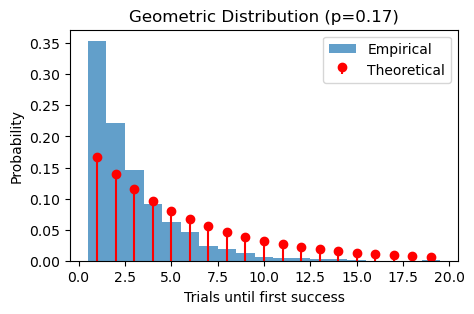

In [28]:
# Theoretical PMF
k_values = list(range(1, max(geom_samples) + 1))
pmf = geom.pmf(k_values, p_success)

plt.figure(figsize=(5,3))
plt.hist(geom_samples, bins=np.arange(0.5, 20.5), density=True, alpha=0.7, label='Empirical')
plt.stem(k_values, pmf, linefmt='r-', markerfmt='ro', basefmt=' ', label='Theoretical')
plt.title(f'Geometric Distribution (p={p_success:.2f})')
plt.xlabel('Trials until first success')
plt.ylabel('Probability')
plt.legend()
plt.show()

## 2️⃣ Gaussian Distribution & Multivariate Gaussians

In [30]:
# import scipy.stats as stats
from scipy.stats import gaussian_kde
from scipy.stats import multivariate_normal
from scipy.stats import norm

#### Visualizing Probability Density Functions (PDFs)
Plot the PDF and CDF of a continuous distribution.

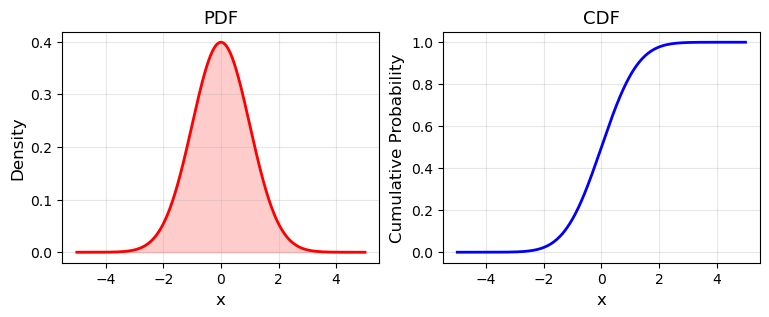

In [32]:
# Example: Normal (Gaussian) Distribution
x_range = np.linspace(-5, 5, 1000)
mean, std = 0, 1
pdf = norm.pdf(x_range, mean, std)
cdf = norm.cdf(x_range, mean, std)

# Plot
plt.figure(figsize=(9, 3))

# PDF
plt.subplot(1, 2, 1)
plt.plot(x_range, pdf, 'r-', linewidth=2)
plt.fill_between(x_range, pdf, alpha=0.2, color='red')
plt.title('PDF', fontsize=13)
plt.xlabel('x', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, alpha=0.3)

# CDF
plt.subplot(1, 2, 2)
plt.plot(x_range, cdf, 'b-', linewidth=2)
plt.title('CDF', fontsize=13)
plt.xlabel('x', fontsize=12)
plt.ylabel('Cumulative Probability', fontsize=12)
plt.grid(True, alpha=0.3)

#### Properties of the Gaussian Distribution


Empirical Rule (68-95-99.7 Rule):
Percentage within 1σ: 68.2% (theoretical: 68.3%)
Percentage within 2σ: 95.4% (theoretical: 95.4%)
Percentage within 3σ: 99.7% (theoretical: 99.7%)


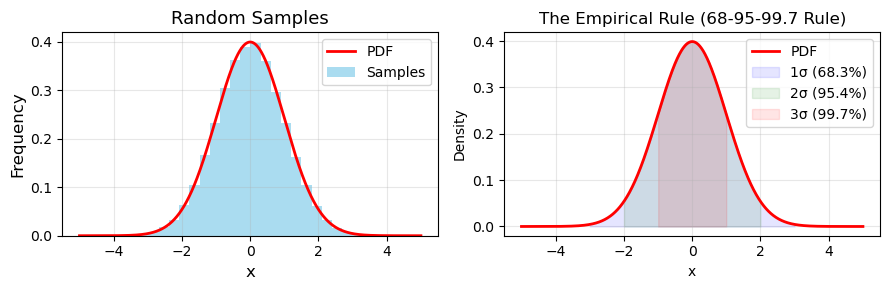

In [34]:
# Generate samples from different Gaussians
x_range = np.linspace(-5, 5, 1000)

# Demonstrate the empirical rule (68-95-99.7 rule)
mean, std = 0, 1
samples = np.random.normal(mean, std, 100000)
# samples = norm.rvs(0, 1, size=1000) # Alternative way

# Calculate the percentage of data within 1, 2, and 3 standard deviations
within_1std = np.mean((samples >= mean - std) & (samples <= mean + std))
within_2std = np.mean((samples >= mean - 2*std) & (samples <= mean + 2*std))
within_3std = np.mean((samples >= mean - 3*std) & (samples <= mean + 3*std))

print("\nEmpirical Rule (68-95-99.7 Rule):")
print(f"Percentage within 1σ: {within_1std:.1%} (theoretical: 68.3%)")
print(f"Percentage within 2σ: {within_2std:.1%} (theoretical: 95.4%)")
print(f"Percentage within 3σ: {within_3std:.1%} (theoretical: 99.7%)")

# Plot
plt.figure(figsize=(9, 3))

# Histogram of samples
plt.subplot(1, 2, 1)
plt.hist(samples, bins=30, density=True, alpha=0.7, color='skyblue')
plt.plot(x_range, pdf, 'r-', linewidth=2)
plt.title('Random Samples', fontsize=13)
plt.xlabel('x', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(['PDF', 'Samples'])
plt.grid(True, alpha=0.3)

# Visualize the empirical rule
plt.subplot(1, 2, 2)

plt.plot(x_range, norm.pdf(x_range, mean, std), 'r-', linewidth=2)

# Shade regions
shade_1sigma = x_range[(x_range >= -1) & (x_range <= 1)]
shade_2sigma = x_range[(x_range >= -2) & (x_range <= 2)]
shade_3sigma = x_range[(x_range >= -3) & (x_range <= 3)]

plt.fill_between(shade_3sigma, 0, norm.pdf(shade_3sigma, mean, std), color='blue', alpha=0.1)
plt.fill_between(shade_2sigma, 0, norm.pdf(shade_2sigma, mean, std), color='green', alpha=0.1)
plt.fill_between(shade_1sigma, 0, norm.pdf(shade_1sigma, mean, std), color='red', alpha=0.1)

plt.title('The Empirical Rule (68-95-99.7 Rule)')
plt.xlabel('x')
plt.ylabel('Density')

plt.legend(['PDF', '1σ (68.3%)', '2σ (95.4%)', '3σ (99.7%)'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Multivariate Gaussian Distribution

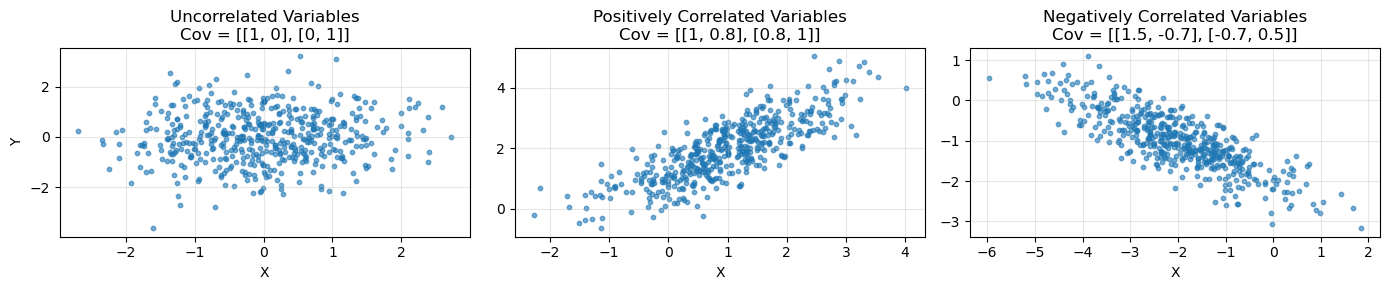

In [36]:
# Example 1: Uncorrelated variables (diagonal covariance matrix)
mean1 = np.array([0, 0])
cov1 = np.array([[1, 0], 
                  [0, 1]])
samples1 = np.random.multivariate_normal(mean1, cov1, 500)

# Example 2: Correlated variables (non-diagonal covariance matrix)
mean2 = np.array([1, 2])
cov2 = np.array([[1, 0.8], 
                  [0.8, 1]])
samples2 = np.random.multivariate_normal(mean2, cov2, 500)

# Example 3: Different variances, negative correlation
mean3 = np.array([-2, -1])
cov3 = np.array([[1.5, -0.7], 
                  [-0.7, 0.5]])
samples3 = np.random.multivariate_normal(mean3, cov3, 500)

# Visualize the distributions
fig, axs = plt.subplots(1, 3, figsize=(14, 3))

# Plot first distribution
axs[0].scatter(samples1[:, 0], samples1[:, 1], alpha=0.6, s=10)
axs[0].set_title('Uncorrelated Variables\nCov = [[1, 0], [0, 1]]')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].grid(True, alpha=0.3)

# Plot second distribution
axs[1].scatter(samples2[:, 0], samples2[:, 1], alpha=0.6, s=10)
axs[1].set_title('Positively Correlated Variables\nCov = [[1, 0.8], [0.8, 1]]')
axs[1].set_xlabel('X')
axs[1].grid(True, alpha=0.3)

# Plot third distribution
axs[2].scatter(samples3[:, 0], samples3[:, 1], alpha=0.6, s=10)
axs[2].set_title('Negatively Correlated Variables\nCov = [[1.5, -0.7], [-0.7, 0.5]]')
axs[2].set_xlabel('X')
axs[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3️⃣ Bayes' Theorem & Conditional Probability
<center><img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*Jg15nVzUmaY-fzDzySGNPg.png" alt="Bayes" width=400/></center>

#### Implementing Bayes' Theorem

Bayesian Updates

$P(A|B) = \frac{P(B|A)P(A)}{P(B)} = \frac{P(B|A)P(A)}{\sum P(B|A_i)P(A_i)}$

Example: Medical testing scenario
- Prior probability of having a disease: 1%
- Test sensitivity (true positive rate): 95%
- Test specificity (true negative rate): 90%

Question: If a person tests positive, what's the probability they have the disease?

In [39]:
# Prior and conditional probabilities
p_disease = 0.01  # Prior probability of disease
p_positive_given_disease = 0.95  # Sensitivity
p_negative_given_no_disease = 0.90  # Specificity
p_positive_given_no_disease = 1 - p_negative_given_no_disease  # False positive rate

> **TODO**: Implement Bayes' theorem to calculate the posterior probability
> - Calculate `P(d|+)` using the formula:
> - `P(d|+) = P(+|d) * P(d) / P(+)`
> - where `P(+) = P(+|d)*P(d) + P(+|no d)*P(no d)`

In [41]:
# TODO: Use the following snippets to complete the code:
#--------- p_positive_given_disease * p_disease / p_positive
#--------- p_positive_given_disease * p_disease
#--------- p_positive_given_no_disease * p_no_disease
# p_no_disease = ?
# p_positive = ?
# p_disease_given_positive = ? / p_positive

# Display the result
print(f"Prior probability of disease: {p_disease:.1%}")
print(f"Probability of positive test given disease: {p_positive_given_disease:.1%}")
print(f"Probability of positive test given no disease: {p_positive_given_no_disease:.1%}")
print(f"Posterior probability of disease given positive test: {p_disease_given_positive:.1%}")

Prior probability of disease: 1.0%
Probability of positive test given disease: 95.0%
Probability of positive test given no disease: 10.0%
Posterior probability of disease given positive test: 8.8%


#### Confusion Matrix
<center><img src="https://ars.els-cdn.com/content/image/3-s2.0-B9780128240540000265-f02-04-9780128240540.jpg" alt="Confusion Matrix" width=200/></center>

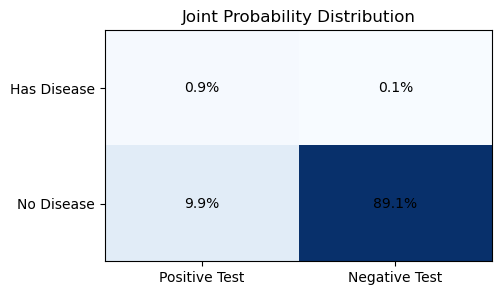

In [43]:
# Create visualization
plt.figure(figsize=(5, 3))

# Create a 2x2 grid for the confusion matrix
data = np.array([
    [p_disease * p_positive_given_disease, p_disease * (1 - p_positive_given_disease)],
    [p_no_disease * p_positive_given_no_disease, p_no_disease * p_negative_given_no_disease]]
)

# Plot heatmap
plt.imshow(data, cmap='Blues', aspect='auto')
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        plt.text(j, i, f'{data[i, j]:.1%}', ha='center', va='center', color='black')
plt.xticks([0, 1], ['Positive Test', 'Negative Test'])
plt.yticks([0, 1], ['Has Disease', 'No Disease'])
plt.title('Joint Probability Distribution')
plt.show()

<center><img src="https://www.all-about-psychology.com/images/type-1-and-type-2-errors.jpg" alt="Confusion Matrix" width=400/></center>

## 🪙 Bayesian Coin Fairness Analysis
#### The Bayesian Way
Model parameter $\theta$ as a **random variable**, drawn from a distribution $P(\theta)$.
- $\theta$ represents the probability of heads
- Prior belief: $P(\theta) = \text{Beta}(\alpha, \beta)$
- Likelihood: $P(D|\theta) = \text{Binomial}(n_H, n)$
- Posterior: $P(\theta|D) \propto P(D|\theta)P(\theta)$

<center><img src="https://av-eks-blogoptimized.s3.amazonaws.com/1266981.png" alt="Bayes" width=300/></center>

In [46]:
from scipy.stats import beta

p_true = 0.6
N = 50

#### Bayesian Updating Process
After observing data $D = \{n_H \text{ heads}, n_T \text{ tails}\}$:
$$P(\theta|D) \propto \theta^{n_H + \alpha -1} (1 - \theta)^{n_T + \beta -1}$$
The posterior is also a Beta distribution:
$$\text{Beta}(\alpha + n_H, \beta + n_T)$$

> **TODO**: Implement Bayesian coin flip probability estimation with step-by-step updating visualization

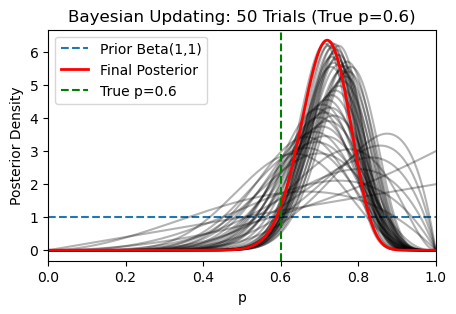

In [49]:
successes = 0
x = np.linspace(0, 1, 1000)

# Initialize plot
plt.figure(figsize=(5,3))
plt.plot(x, beta.pdf(x, 1, 1), '--', label='Prior Beta(1,1)')
plt.xlim(0, 1)
# plt.ylim(0, 15)
plt.xlabel('p')
plt.ylabel('Posterior Density')
plt.title(f'Bayesian Updating: {N} Trials (True p={p_true})')

# for i in range(1, N+1):
#     success = np.random.binomial(1, p_true)
#     successes += success
#     a = 1 + ??? # TODO
#     b = 1 + ??? # TODO
#     plt.plot(x, beta.pdf(x, a, b), 'k-', alpha=0.3)

# Final posterior
plt.plot(x, beta.pdf(x, a, b), 'r-', lw=2, label='Final Posterior')
plt.axvline(x=p_true, color='green', linestyle='--', 
            label=f'True p={p_true:.1f}')
plt.legend()
plt.show()

## 4️⃣ Practical Task: Bimodal Distribution

In [51]:
from scipy.stats import gaussian_kde
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KernelDensity

In [53]:
mean1 = np.array([10, 2])
cov1 = np.array([[1.0, 0], [0, 1.0]])
mean2 = np.array([0, 0])
cov2 = np.array([[2.9, -1.4], [-1.4, 1.3]])

> **TODO**: Modify the code below to generate a bimodal 2D distribution with: <br>
> $p(x)= 0.4\,\mathcal{N}(x\mid \mu_1,\Sigma_1) + 0.6\,\mathcal{N}(x\mid \mu_2,\Sigma_2)$

In [54]:
def generate_bimodal_data(n_samples, mean1, cov1, mean2, cov2):
    cluster1 = np.random.multivariate_normal(mean1, cov1, n_samples // 2)
    cluster2 = np.random.multivariate_normal(mean2, cov2, n_samples // 2)
    return np.vstack([cluster1, cluster2])

data = generate_bimodal_data(1000, mean1, cov1, mean2, cov2)

> **TODO**: Calculate statistics

In [56]:
# mean = np.mean(???)
# median = np.median(???)

#### Estimate density for mode calculation
We'll use KDE to estimate the density and find the peaks

In [58]:
# X-dimension
kde_x = KernelDensity(bandwidth=0.5).fit(data[:,0].reshape(-1, 1))
x_range = np.linspace(min(data[:,0]) - 1, max(data[:,0]) + 1, 1000).reshape(-1, 1)
log_dens_x = kde_x.score_samples(x_range)

# Y-dimension
kde_y = KernelDensity(bandwidth=0.5).fit(data[:,1].reshape(-1, 1))
y_range = np.linspace(min(data[:,1]) - 1, max(data[:,1]) + 1, 1000).reshape(-1, 1)
log_dens_y = kde_y.score_samples(y_range)

# Calculate 2D KDE for the main plot
x_grid, y_grid = np.meshgrid(np.linspace(min(data[:,0]) - 1, max(data[:,0]) + 1, 100),
                            np.linspace(min(data[:,1]) - 1, max(data[:,1]) + 1, 100))
positions = np.vstack([x_grid.ravel(), y_grid.ravel()]).T
kde_2d = KernelDensity(bandwidth=0.5).fit(data)
z = np.exp(kde_2d.score_samples(positions)).reshape(x_grid.shape)

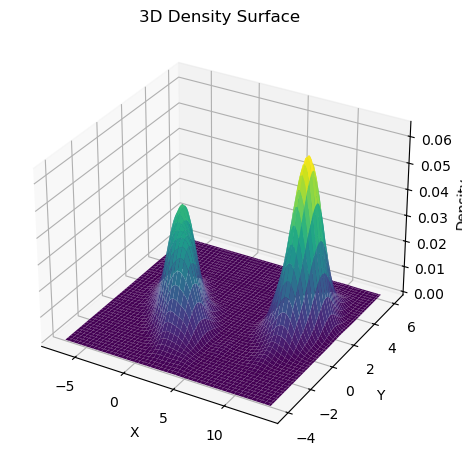

In [59]:
fig = plt.figure(figsize=(15, 12))

# 3D surface plot
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
surf = ax2.plot_surface(x_grid, y_grid, z, cmap='viridis', linewidth=0, antialiased=True)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Density')
ax2.set_title('3D Density Surface')
plt.show()

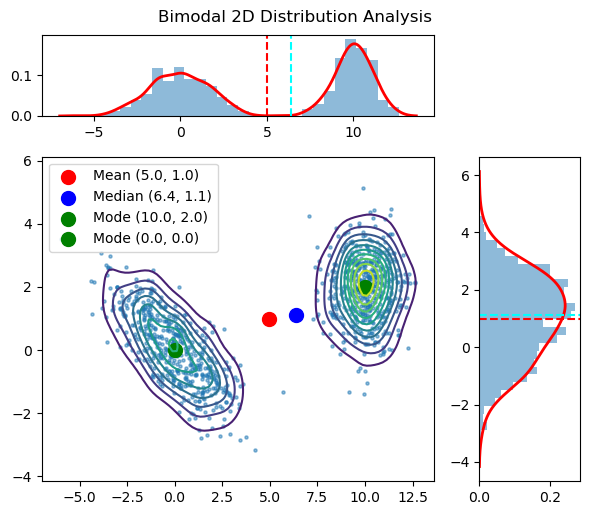

In [60]:
plt.figure(figsize=(6, 5))

plt.subplot2grid((4,4), (1,0), colspan=3, rowspan=4)
plt.contour(x_grid, y_grid, z, levels=10, cmap='viridis')
plt.scatter(data[:,0], data[:,1], alpha=0.5, s=5)

plt.scatter(*mean, c='r', s=100, label=f'Mean ({mean[0]:.1f}, {mean[1]:.1f})')
plt.scatter(*median, c='b', s=100, label=f'Median ({median[0]:.1f}, {median[1]:.1f})')
plt.scatter(*mean1, c='g', s=100, label=f'Mode ({mean1[0]:.1f}, {mean1[1]:.1f})')
plt.scatter(*mean2, c='g', s=100, label=f'Mode ({mean2[0]:.1f}, {mean2[1]:.1f})')
plt.legend()

plt.subplot2grid((4,4), (0,0), colspan=3)
plt.hist(data[:,0], bins=30, density=True, alpha=0.5)
plt.plot(x_range, np.exp(log_dens_x), 'r-', linewidth=2)
plt.axvline(mean[0], color='red', linestyle='--')
plt.axvline(median[0], color='cyan', linestyle='--')

plt.subplot2grid((4,4), (1,3), rowspan=3)
plt.hist(data[:,1], bins=30, density=True, orientation='horizontal', alpha=0.5)
plt.plot(np.exp(log_dens_y), y_range, 'r-', linewidth=2)
plt.axhline(mean[1], color='red', linestyle='--')
plt.axhline(median[1], color='cyan', linestyle='--')

plt.tight_layout()
plt.suptitle('Bimodal 2D Distribution Analysis', y=1.02)
plt.show()